# **Lecture 3: Mean-Variance Portfolios and ESG Investing**


## **Part I: Incorporating Green Assets**

**Objective**: To analyse the impact of including environmentally sustainable ("green") assets <br>
in traditional investment portfolios using Modern Portfolio Theory (Lalwani, 2024).


### **1. Download Indexes**
Using the `yfinance` library, download 10 years of adjusted daily closing prices for all ETFs <br>
listed in **Table 1** (traditional market indexes) and **Table 2** (green or sustainable indexes). <br>
Store the data in a single `DataFrame` for further analysis.


**Table 1 — List of ETFs**


| **ETF Name**                     | **Ticker** | **Underlying Index**               |
|:---------------------------------|:-----------|:----------------------------------|
| iShares Core S&P 500 ETF         | IVV        | S&P 500                           |
| iShares MSCI Emerging Markets ETF| EEM        | MSCI Emerging Markets             |
| iShares MSCI EAFE ETF            | EFA        | MSCI EAFE Index                   |
| iShares MSCI ACWI ETF            | ACWI       | MSCI ACWI Index (World)           |
| iShares MSCI Size ETF            | SIZE       | MSCI USA Low Size Index           |


**Table 2 — List of Green ETFs**


| **ETF Name**                          | **Ticker** | **Underlying Index**                       |
|:--------------------------------------|:-----------|:------------------------------------------|
| NASDAQ Clean Edge Green Energy        | QCLN       | NASDAQ Clean Edge Green Energy Index      |
| Invesco S&P Global Water Index ETF    | CGW        | S&P Global Water Index                    |
| Invesco Solar ETF                     | TAN        | MAC Global Solar Energy Index             |
| First Trust Global Wind Energy ETF    | FAN        | ISE Clean Edge Global Wind Energy Index   |





In [112]:
import pandas as pd
import numpy as np
import yfinance as yf

tickers = ["IVV","EEM","EFA","ACWI","SIZE","QCLN","CGW","TAN","FAN"]

# Download prices
px = yf.download(tickers, start="2015-01-01", auto_adjust=True, progress=False)["Close"].dropna(how="all")
px

Ticker,ACWI,CGW,EEM,EFA,FAN,IVV,QCLN,SIZE,TAN
Date,,,,,,,,,
2015-01-02,47.416538,23.604910,30.789457,44.573959,8.185007,171.706543,16.106281,54.750530,30.793396
2015-01-05,46.482185,23.039274,30.241486,43.521786,7.974535,168.691483,15.556670,54.088360,29.986856
2015-01-06,46.002804,22.887308,30.114416,43.028797,7.990124,167.171463,15.221316,53.870434,29.406879
2015-01-07,46.604053,23.106812,30.765638,43.507065,7.904377,169.239685,15.342417,54.364986,29.415936
2015-01-08,47.335285,23.292545,31.289776,44.095703,8.052486,172.262985,15.724349,55.178009,30.104670
...,...,...,...,...,...,...,...,...,...
2025-10-10,135.710007,62.939999,51.939999,92.239998,19.830000,656.200012,42.250000,156.740005,44.950001
2025-10-13,137.820007,63.189999,53.450001,92.980003,20.170000,666.229980,45.599998,158.429993,46.320000
2025-10-14,137.679993,63.830002,52.970001,93.400002,20.110001,665.479980,46.189999,160.009995,46.889999


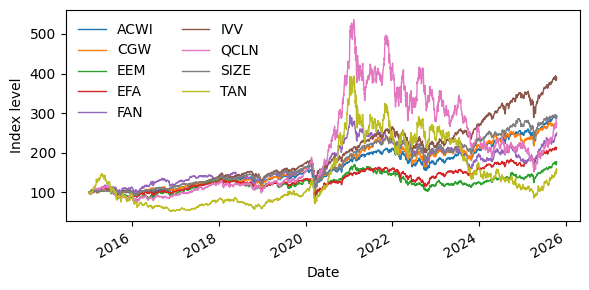

In [113]:
import matplotlib.pyplot as plt

# Rebase to 100 at the first observation
rebased = px.div(px.iloc[0]).mul(100)

fig, ax = plt.subplots(figsize=(6, 3))
rebased.plot(ax=ax, linewidth=1)

ax.set_xlabel("Date")
ax.set_ylabel("Index level")
ax.legend(ncol=2, frameon=False)

fig.tight_layout()
plt.show()


### **2. Compute Returns and Risk Measures**

From the downloaded price data, compute daily returns. Then calculate annualized mean returns, <br>
variances, and volatilities (assuming 252 trading days per year).

In [114]:
ret = px.pct_change().dropna()
mu = ret.mean() * 252
std = ret.std() * np.sqrt(252)
var = std ** 2

In [115]:
summary = pd.DataFrame({
    "Annualized Mean (%)": mu * 100,
    "Annualized Std (%)":  std * 100,
    "Annualized Var":      var
}).loc[tickers].round(2)

display(summary)

,Annualized Mean (%),Annualized Std (%),Annualized Var
Ticker,,,
IVV,14.19,18.01,0.03
EEM,7.37,20.55,0.04
EFA,8.47,17.31,0.03
ACWI,11.40,17.13,0.03
SIZE,11.60,18.48,0.03
QCLN,15.44,33.54,0.11
CGW,10.91,17.62,0.03
TAN,11.35,37.98,0.14
FAN,10.69,20.99,0.04


### **3. Compute and report summary statistics**

Mean, Standard Deviation, Skewness, Kurtosis, Minimum, $5 \%, 25 \%$, Median, $75 \%, 95 \%$, Maximum, and sample size (n).

In [116]:
summary = pd.DataFrame({
    "Mean": ret.mean(), "Std Dev": ret.std(),
    "Skewness": ret.skew(), "Kurtosis": ret.kurt(),
    "Min": ret.min(), "5%": ret.quantile(0.05),
    "25%": ret.quantile(0.25), "Median": ret.median(),
    "75%": ret.quantile(0.75), "95%": ret.quantile(0.95),
    "Max": ret.max(), "n": ret.count()}).round(4)

display(summary)

,Mean,Std Dev,Skewness,Kurtosis,Min,5%,25%,Median,75%,95%,Max,n
Ticker,,,,,,,,,,,,
ACWI,0.0005,0.0108,-0.6320,13.9879,-0.1122,-0.0161,-0.0041,0.0007,0.0057,0.0156,0.0879,2713
CGW,0.0004,0.0111,-0.4568,12.0323,-0.1123,-0.0165,-0.0048,0.0007,0.0059,0.0159,0.0841,2713
EEM,0.0003,0.0129,-0.4951,7.8306,-0.1248,-0.0195,-0.0066,0.0007,0.0076,0.0197,0.0805,2713
EFA,0.0003,0.0109,-0.8217,13.4899,-0.1099,-0.0159,-0.0047,0.0006,0.0059,0.0152,0.0847,2713
FAN,0.0004,0.0132,-0.3958,8.3601,-0.1161,-0.0200,-0.0061,0.0005,0.0075,0.0198,0.1036,2713
IVV,0.0006,0.0113,-0.3632,14.6931,-0.1157,-0.0169,-0.0037,0.0007,0.0059,0.0157,0.0951,2713
QCLN,0.0006,0.0211,0.0448,3.8196,-0.1298,-0.0327,-0.0103,0.0011,0.0119,0.0331,0.1461,2713
SIZE,0.0005,0.0116,-0.6685,17.8959,-0.1359,-0.0171,-0.0042,0.0006,0.0059,0.0169,0.1021,2713
TAN,0.0005,0.0239,-0.0141,3.5731,-0.1608,-0.0364,-0.0124,0.0002,0.0135,0.0384,0.1350,2713


### **4. Explore Correlations Between Assets**

Compute the correlation matrix of all ETFs (traditional and green). How are green ETFs correlated <br>
with traditional market indexes? What might this imply for diversification benefits?


In [122]:
traditional = ["IVV", "EEM", "EFA", "ACWI", "SIZE"]   # traditional ETFs
green = ["QCLN", "CGW", "TAN", "FAN"]                 # green ETFs
tickers = traditional + green

corr = ret.corr()

# Extract green vs traditional correlations
cross_corr = corr.loc[green, traditional]

# Print results
print("Correlation Matrix (All ETFs)")
display(corr.round(2))

print("Green vs Traditional Correlations")
display(cross_corr.round(2))

avg_cross = cross_corr.values.mean()
print(f"Average correlation between Green and Traditional ETFs: {avg_cross:.2f}")

Correlation Matrix (All ETFs)


Ticker,ACWI,CGW,EEM,EFA,FAN,IVV,QCLN,SIZE,TAN
Ticker,,,,,,,,,
ACWI,1.00,0.88,0.85,0.93,0.77,0.97,0.74,0.93,0.61
CGW,0.88,1.00,0.73,0.87,0.77,0.84,0.65,0.86,0.56
EEM,0.85,0.73,1.00,0.83,0.71,0.76,0.66,0.72,0.61
EFA,0.93,0.87,0.83,1.00,0.79,0.85,0.66,0.83,0.58
FAN,0.77,0.77,0.71,0.79,1.00,0.70,0.69,0.70,0.68
IVV,0.97,0.84,0.76,0.85,0.70,1.00,0.72,0.93,0.57
QCLN,0.74,0.65,0.66,0.66,0.69,0.72,1.00,0.74,0.85
SIZE,0.93,0.86,0.72,0.83,0.70,0.93,0.74,1.00,0.59
TAN,0.61,0.56,0.61,0.58,0.68,0.57,0.85,0.59,1.00


Green vs Traditional Correlations


Ticker,IVV,EEM,EFA,ACWI,SIZE
Ticker,,,,,
QCLN,0.72,0.66,0.66,0.74,0.74
CGW,0.84,0.73,0.87,0.88,0.86
TAN,0.57,0.61,0.58,0.61,0.59
FAN,0.70,0.71,0.79,0.77,0.70


Average correlation between Green and Traditional ETFs: 0.72


### **5. Performance of Optimal Portfolios Including Green Assets:**  
  The objective is to evaluate the benefit of incorporating green assets into portfolio allocation.  
  Consider an investor who seeks to maximize the Sharpe Ratio of their portfolio.

  For each index, compute the optimal portfolio both (i) using only the index and (ii) adding the four green ETFs.  
  Then compare performance metrics — annualized return, volatility, cumulative return, and Sharpe ratio — for:

  - The original market index (benchmark portfolio)  
  - The index plus the four green ETFs (optimal green portfolio)  
  - All indexes combined  
  - All indexes combined with green ETFs  

  Reproduce the following tables to summarize your results:

**Table 1 — Emerging Market Portfolio Performance**

| **Metric**               | **Index Only** | **Index + Green (Optimal)** |
|:--------------------------|:---------------|:-----------------------------|
| Annualized Return         | ...%           | ...%                         |
| Annualized Std. Dev.      | ...%           | ...%                         |
| Cumulative Return         | ...%           | ...%                         |
| Annualized Sharpe Ratio   | ...            | ...                          |


**Table 2 — Developed Market Portfolio Performance**

| **Metric**               | **Index Only** | **Index + Green (Optimal)** |
|:--------------------------|:---------------|:-----------------------------|
| Annualized Return         | ...%           | ...%                         |
| Annualized Std. Dev.      | ...%           | ...%                         |
| Cumulative Return         | ...%           | ...%                         |
| Annualized Sharpe Ratio   | ...            | ...                          |

**Table 3 — All Indexes Portfolio Performance**

| **Metric**               | **All Indexes** | **All Indexes + Green (Optimal)** |
|:--------------------------|:----------------|:----------------------------------|
| Annualized Return         | ...%            | ...%                              |
| Annualized Std. Dev.      | ...%            | ...%                              |
| Cumulative Return         | ...%            | ...%                              |
| Annualized Sharpe Ratio   | ...             | ...                               |



In [118]:
from pypfopt import EfficientFrontier, expected_returns, risk_models

traditional = ["IVV", "EEM", "EFA", "ACWI", "SIZE"]
green = ["QCLN", "CGW", "TAN", "FAN"]
universe = sorted(set(traditional + green))

def max_sharpe_w(tickers):
    # -------- PyPortfolioOpt helper (max Sharpe, long-only)
    sub = px[tickers].dropna()
    mu = expected_returns.mean_historical_return(sub, frequency=252) 
    S  = risk_models.sample_cov(sub, frequency=252)
    ef = EfficientFrontier(mu, S, weight_bounds=(0, 1))
    ef.max_sharpe(risk_free_rate=0)
    w = ef.clean_weights()
    return pd.Series(w).reindex(tickers).fillna(0.0).values

def perf(returns, w):
    # -------- Realized performance
    p = (returns @ w).dropna()
    ann_ret = p.mean() * 252
    ann_vol = p.std() * np.sqrt(252)
    sharpe  = (ann_ret) / ann_vol if ann_vol > 0 else np.nan
    cum_ret = (1 + p).prod() - 1
    return ann_ret, ann_vol, cum_ret, sharpe

def print_table(title, left_name, right_name, left_vals, right_vals):
    rows = [
        ("Annualized Return",     f"{left_vals[0]*100:.2f}%", f"{right_vals[0]*100:.2f}%"),
        ("Annualized Std. Dev.",  f"{left_vals[1]*100:.2f}%", f"{right_vals[1]*100:.2f}%"),
        ("Cumulative Return",     f"{left_vals[2]*100:.2f}%", f"{right_vals[2]*100:.2f}%"),
        ("Annualized Sharpe Ratio", f"{left_vals[3]:.2f}",    f"{right_vals[3]:.2f}"),
    ]
    df = pd.DataFrame(rows, columns=["Metric", left_name, right_name])
    print(f"\n{title}\n")
    display(df.reset_index(drop=True))

# -------- Table 1: Emerging (EEM) --------
eem_base = perf(ret[["EEM"]], np.array([1.0]))
eem_opt  = perf(ret[["EEM"] + green], max_sharpe_w(["EEM"] + green))
print_table("Table 1 — Emerging Market",
            "Index Only", "Index + Green (Optimal)", eem_base, eem_opt)

# -------- Table 2: Developed (EFA) --------
efa_base = perf(ret[["EFA"]], np.array([1.0]))
efa_opt  = perf(ret[["EFA"] + green], max_sharpe_w(["EFA"] + green))
print_table("Table 2 — Developed Market",
            "Index Only", "Index + Green (Optimal)", efa_base, efa_opt)

# -------- Table 3: Low Size --------
efa_base = perf(ret[["SIZE"]], np.array([1.0]))
efa_opt  = perf(ret[["SIZE"] + green], max_sharpe_w(["SIZE"] + green))
print_table("Table 3 — Low Size",
            "Index Only", "Index + Green (Optimal)", efa_base, efa_opt)

# -------- Table 4: US Market --------
efa_base = perf(ret[["IVV"]], np.array([1.0]))
efa_opt  = perf(ret[["IVV"] + green], max_sharpe_w(["IVV"] + green))
print_table("Table 4 — US Market",
            "Index Only", "Index + Green (Optimal)", efa_base, efa_opt)

# -------- Table 5: MSCI World --------
efa_base = perf(ret[["ACWI"]], np.array([1.0]))
efa_opt  = perf(ret[["ACWI"] + green], max_sharpe_w(["ACWI"] + green))
print_table("Table 5 — MSCI World",
            "Index Only", "Index + Green (Optimal)", efa_base, efa_opt)

# -------- Table 6: All Indexes vs All Indexes + Green --------
idx_only = ["IVV", "EEM", "EFA", "ACWI", "SIZE"]
all_base = perf(ret[idx_only], np.ones(len(idx_only))/len(idx_only))
all_opt  = perf(ret[idx_only + green], max_sharpe_w(idx_only + green))
print_table("Table 6 — All Indexes Portfolio Performance",
            "All Indexes", "All Indexes + Green (Optimal)", all_base, all_opt)



Table 1 — Emerging Market



,Metric,Index Only,Index + Green (Optimal)
0,Annualized Return,7.37%,10.91%
1,Annualized Std. Dev.,20.55%,17.62%
2,Cumulative Return,76.00%,173.67%
3,Annualized Sharpe Ratio,0.36,0.62



Table 2 — Developed Market



,Metric,Index Only,Index + Green (Optimal)
0,Annualized Return,8.47%,10.91%
1,Annualized Std. Dev.,17.31%,17.62%
2,Cumulative Return,111.65%,173.67%
3,Annualized Sharpe Ratio,0.49,0.62



Table 3 — Low Size



,Metric,Index Only,Index + Green (Optimal)
0,Annualized Return,11.60%,11.27%
1,Annualized Std. Dev.,18.48%,17.43%
2,Cumulative Return,189.73%,185.48%
3,Annualized Sharpe Ratio,0.63,0.65



Table 4 — US Market



,Metric,Index Only,Index + Green (Optimal)
0,Annualized Return,14.19%,14.19%
1,Annualized Std. Dev.,18.01%,18.01%
2,Cumulative Return,286.69%,286.69%
3,Annualized Sharpe Ratio,0.79,0.79



Table 5 — MSCI World



,Metric,Index Only,Index + Green (Optimal)
0,Annualized Return,11.40%,11.33%
1,Annualized Std. Dev.,17.13%,16.93%
2,Cumulative Return,191.21%,190.02%
3,Annualized Sharpe Ratio,0.67,0.67



Table 6 — All Indexes Portfolio Performance



,Metric,All Indexes,All Indexes + Green (Optimal)
0,Annualized Return,10.61%,14.19%
1,Annualized Std. Dev.,17.21%,18.01%
2,Cumulative Return,166.89%,286.69%
3,Annualized Sharpe Ratio,0.62,0.79


### **6. Plot the Efficient Frontiers: ETFs vs Green ETFs**  
  Plot the efficient frontiers for:
  1. Traditional ETFs (only Table 1)  
  2. Traditional + Green ETFs (Tables 1 and 2)  

  Visually compare the shift in the frontier and discuss the implications for an investor.

In [119]:
traditional = ["IVV","EEM","EFA","ACWI","SIZE"]
green = ["QCLN","CGW","TAN","FAN"]
all_universe = traditional + green

# Annualized covariance
S_trad = ret[traditional].cov() * 252 * 100**2
S_all  = ret[all_universe].cov() * 252 * 100**2

# Expected returns from mu
mu_trad = mu[traditional]
mu_all  = mu[all_universe]

# Efficient frontiers
ef_trad = EfficientFrontier(mu_trad*100, S_trad, weight_bounds=(0, 1))
ef_all  = EfficientFrontier(mu_all*100,  S_all,  weight_bounds=(0, 1))

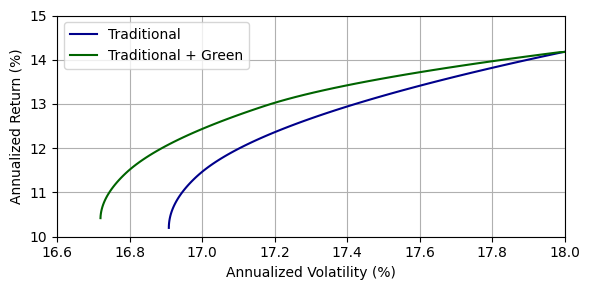

In [120]:
from pypfopt import plotting

# Plot the frontiers
fig, ax = plt.subplots(figsize=(6, 3))
plotting.plot_efficient_frontier(ef_trad, ax=ax, points=100, show_assets=False)
trad_line = ax.lines[-1]
trad_line.set_label("Traditional")
trad_line.set_color("darkblue")    

plotting.plot_efficient_frontier(ef_all,  ax=ax, points=100, show_assets=False, color="green")
all_line = ax.lines[-1]
all_line.set_label("Traditional + Green")
all_line.set_color("darkgreen") 

ax.set_xlabel("Annualized Volatility (%)")
ax.set_ylabel("Annualized Return (%)")
ax.grid(True)
ax.set_xlim([16.6,18])
ax.set_ylim([10,15])
ax.legend(loc="upper left")
plt.tight_layout()
plt.show()

### **7. Sensitivity to Time Period**

Repeat the analysis using only the last 5 years of data (since 2020). How stable are the optimal <br>
weights and Sharpe ratios compared to the 10-year period? What does this suggest about the time <br>
sensitivity of ESG performance?

In [121]:
periods = {
    "Since 2020":   "2020-01-01",
    "2015 present": "2015-01-01",
    "Since 2018":   "2018-01-01",
}

for label, start in periods.items():
    # Subset data for this window
    px_sub  = px.loc[start:]
    ret_sub = ret.loc[start:]

    # --- Equal-weight baseline on traditional indexes
    all_base = perf(ret_sub[idx_only], np.ones(len(idx_only)) / len(idx_only))

    # --- Max-Sharpe on (indexes + green) using max_sharpe_w
    _px_backup = px             # temporarily replace the global px the function uses
    px = px_sub
    try:
        w_opt = max_sharpe_w(idx_only + green)
    finally:
        px = _px_backup        # restore original px

    all_opt  = perf(ret_sub[idx_only + green], w_opt)

    print_table(f"Portfolio Performance ({label})",
                "All Indexes", "All Indexes + Green (Optimal)", all_base, all_opt)


Portfolio Performance (Since 2020)



,Metric,All Indexes,All Indexes + Green (Optimal)
0,Annualized Return,11.94%,16.22%
1,Annualized Std. Dev.,19.88%,21.17%
2,Cumulative Return,77.70%,124.11%
3,Annualized Sharpe Ratio,0.60,0.77



Portfolio Performance (2015 present)



,Metric,All Indexes,All Indexes + Green (Optimal)
0,Annualized Return,10.61%,14.19%
1,Annualized Std. Dev.,17.21%,18.01%
2,Cumulative Return,166.89%,286.69%
3,Annualized Sharpe Ratio,0.62,0.79



Portfolio Performance (Since 2018)



,Metric,All Indexes,All Indexes + Green (Optimal)
0,Annualized Return,10.72%,15.25%
1,Annualized Std. Dev.,18.52%,19.76%
2,Cumulative Return,101.14%,180.94%
3,Annualized Sharpe Ratio,0.58,0.77
